In [ ]:
# Install package
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 14.3 MB/s 


In [ ]:
#Mounting the drive

# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzip the dataset from folder
!unzip /content/drive/MyDrive/Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/val/Peach___Bacterial_spot/image (1273).JPG  
  inflating: __MACOSX/Dataset/val/Peach___Bacterial_spot/._image (1273).JPG  
  inflating: Dataset/val/Peach___Bacterial_spot/image (640).JPG  
  inflating: __MACOSX/Dataset/val/Peach___Bacterial_spot/._image (640).JPG  
  inflating: Dataset/val/Peach___Bacterial_spot/image (2132).JPG  
  inflating: __MACOSX/Dataset/val/Peach___Bacterial_spot/._image (2132).JPG  
  inflating: Dataset/val/Peach___Bacterial_spot/image (2098).JPG  
  inflating: __MACOSX/Dataset/val/Peach___Bacterial_spot/._image (2098).JPG  
  inflating: Dataset/val/Peach___Bacterial_spot/image (80).JPG  
  inflating: __MACOSX/Dataset/val/Peach___Bacterial_spot/._image (80).JPG  
  inflating: Dataset/val/Peach___Bacterial_spot/image (1933).JPG  
  inflating: __MACOSX/Dataset/val/Peach___Bacterial_spot/._image (1933).JPG  
  inflating: Dataset/val/Peach___Bacterial_spot/image (494).JPG  
  inflating: __MACO

In [ ]:
# Import all the required packages.......

import os
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from time import time
from datetime import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.regularizers import *
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model, model_from_json
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import ResNet101V2, ResNet152V2
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169,DenseNet201
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.xception import Xception 
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import Model 

print(os.getcwd())

#Import the required libaries
import matplotlib.pyplot as plt
from PIL import Image
import os
import gc
import cv2
import numpy as np
from tqdm.notebook import tqdm
from skimage import io
# from matplotlib import cm
# from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
from pylab import rcParams
# rcParams['figure.figsize'] = 20, 10

import pandas as pd
import math
import random
%matplotlib inline

tf.random.set_seed(42)

from tensorflow.keras import layers
import tensorflow_addons as tfa

import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Save the entire model as a SavedModel.
today = datetime.today().strftime('%Y-%m-%d')

/content


In [ ]:
# define image folders

train_dir='/content/Dataset/train'
valid_dir='/content/Dataset/val'
test_dir='/content/Dataset/test'

Size=224

In [ ]:
# making genertors for model feeding
import tensorflow as tf
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1/255.0,
).flow_from_directory(train_dir,batch_size=16,target_size=(Size,Size),subset="training",shuffle=True)

valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
).flow_from_directory(valid_dir,batch_size=16,target_size=(Size,Size),shuffle=False)

Found 42230 images belonging to 38 classes.
Found 9042 images belonging to 38 classes.


In [ ]:
# defining class weight for model 

from sklearn.utils import class_weight 
import numpy as np
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                  classes = np.unique(train_generator.classes), 
                                                  y = train_generator.classes)

class_weights = dict(enumerate(class_weights))
# class_weight=class_weights


## Defining the models function

In [ ]:
def model_design(model_name = "Resnet50", image_size = (224,224,3), train_whole_network = False):
  tf.keras.backend.clear_session()
  # image_input = Input(shape=image_size)
  if model_name == "Resnet50":
    print("Model Resnet50v2 Selected")
    pretrained = ResNet50V2(weights="imagenet",include_top=False,input_shape=(Size,Size,3))
    pretrained.trainable = train_whole_network
  elif model_name == "Resnet101":
    print("Model Resnet101v2 Selected")
    pretrained = ResNet101V2(weights="imagenet",include_top=False,input_shape=(Size,Size,3))
    pretrained.trainable = train_whole_network
  elif model_name == "Resnet152":
    print("Model Resnet152v2 Selected")
    pretrained = ResNet152V2(weights="imagenet",include_top=False,input_shape=(Size,Size,3))
    pretrained.trainable = train_whole_network
  elif model_name == "Inceptionresnetv2":
    print("Model Inceptionresnetv2 Selected")
    pretrained = InceptionResNetV2(weights="imagenet",include_top=False,input_shape=(Size,Size,3))
    pretrained.trainable = train_whole_network
  elif model_name == "DenseNet121":
    print("Model DenseNet121 Selected")
    pretrained = DenseNet121(weights="imagenet",include_top=False,input_shape=(Size,Size,3))
    pretrained.trainable = train_whole_network
  elif model_name == "VGG16":
    print("Model VGG16 Selected")
    pretrained = VGG16(weights="imagenet",include_top=False,input_shape=(Size,Size,3))
    pretrained.trainable = train_whole_network
  elif model_name == "VGG19":
    print("Model VGG19 Selected")
    pretrained = VGG19(weights="imagenet",include_top=False,input_shape=(Size,Size,3))
    pretrained.trainable = train_whole_network
  elif model_name == "Mobilenet":
    print("Model Mobilenetv1 Selected")
    pretrained = MobileNet(weights="imagenet",include_top=False,input_shape=(Size,Size,3))
    pretrained.trainable = train_whole_network
  elif model_name == "Mobilenet2":
    print("Model Mobilenetv2 Selected")
    pretrained = MobileNetV2(weights="imagenet",include_top=False,input_shape=(Size,Size,3))
    pretrained.trainable = train_whole_network
  elif model_name == "Inceptionv3":
    print("Model Inceptionv3 Selected")
    pretrained = InceptionV3(weights="imagenet",include_top=False,input_shape=(Size,Size,3))
    pretrained.trainable = train_whole_network
  elif model_name == "EfficientNet":
    print("Model EfficientNet Selected")
    pretrained = EfficientNetB3(weights="imagenet",include_top=False,input_shape=(Size,Size,3))
    pretrained.trainable = train_whole_network
  else:
    print("Model Xception Selected")
    pretrained = Xception(weights="imagenet",include_top=False,input_shape=(Size,Size,3))
    pretrained.trainable = train_whole_network

  last_layer = pretrained.output

  # Define the layers
  inputs = keras.Input(shape=(Size,Size,3))

  # Get the layer
  x = pretrained(inputs, training = False)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(4096, activation="relu")(x)
  x = tf.keras.layers.Dense(4096, activation="relu")(x)

  x = tf.keras.layers.Dense(38, activation="softmax")(x)
  model = Model(inputs=inputs,outputs= x)
  return model

### Select the model

In [ ]:
cnn = "Inceptionresnetv2"

In [ ]:
log_dir = datetime.now().strftime('model_%Y%m%d_%H%M')
model_name = "model"
log_path = "Hiten/Log"

In [ ]:
# Define the checkpoint directory to store the checkpoints.
# checkpoint_dir = './Hiten/training_checkpoints'
# Define the name of the checkpoint files.
# checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

# Define a function for decaying the learning rate.
# You can define any decay function you need.
def decay(epoch):
  if epoch < 3:
    return 1e-3
  elif epoch >= 3 and epoch < 7:
    return 1e-4
  else:
    return 1e-5

In [ ]:
# Define a callback for printing the learning rate at the end of each epoch.
class PrintLR(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    print('\nLearning rate for epoch {} is {}'.format(epoch + 1, standard_model.optimizer.lr.numpy()))

In [ ]:
# Put all the callbacks together.

decay_steps = 1000

callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='.Hiten/logs'),
    # tf.keras.optimizers.schedules.CosineDecay(
    #     decay , decay_steps, alpha=0.0, name=None
    # ),
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix, monitor='val_loss', save_best_only=True, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=2, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.5e-6),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3),
    tf.keras.callbacks.LearningRateScheduler(decay),
    PrintLR()
]


#CLR Schedular
INIT_LR = 1e-4
MAX_LR = 1e-2

steps_per_epoch = len(train_generator) // 32
clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=INIT_LR,
    maximal_learning_rate=MAX_LR,
    scale_fn=lambda x: 1/(2.**(x-1)),
    step_size=2 * steps_per_epoch
)
new_optimizer = tf.keras.optimizers.SGD(clr)

In [ ]:

standard_model = model_design(model_name=cnn, train_whole_network=False)

batch_size = 32
epochs = 40

optimiser = Adam(learning_rate=0.001)
standard_model.compile(optimizer=optimiser,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

standard_model.summary()
# seed
History = standard_model.fit(train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  shuffle=True,
  callbacks=[callbacks],
  use_multiprocessing=True, 
  workers=10,
  class_weight = class_weights,
  batch_size = batch_size,
  # steps_per_epoch=len(train_generator)//16,validation_steps=len(valid_generator)//16,

  )

print(standard_model.optimizer.lr.numpy())

Model Inceptionresnetv2 Selected
219070464/219055592 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 38400)             0         
                                                                 
 dense (Dense)               (None, 4096)              157290496 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)           

2640/2640 [==============================] - ETA: 0s - loss: 2.1080 - accuracy: 0.5622
Learning rate for epoch 1 is 0.0010000000474974513
2640/2640 [==============================] - 230s 79ms/step - loss: 2.1080 - accuracy: 0.5622 - val_loss: 0.7878 - val_accuracy: 0.7392 - lr: 0.0010
Epoch 2/40
2640/2640 [==============================] - ETA: 0s - loss: 0.8215 - accuracy: 0.7513
Learning rate for epoch 2 is 0.0010000000474974513
2640/2640 [==============================] - 209s 79ms/step - loss: 0.8215 - accuracy: 0.7513 - val_loss: 0.6873 - val_accuracy: 0.7739 - lr: 0.0010
Epoch 3/40
2640/2640 [==============================] - ETA: 0s - loss: 0.6838 - accuracy: 0.7881
Learning rate for epoch 3 is 0.0010000000474974513
2640/2640 [==============================] - 206s 78ms/step - loss: 0.6838 - accuracy: 0.7881 - val_loss: 0.5212 - val_accuracy: 0.8264 - lr: 0.0010
Epoch 4/40
2640/2640 [==============================] - ETA: 0s - loss: 0.4338 - accuracy: 0.8632
Learning rate for e

In [ ]:
# !mkdir -p saved_model
standard_model.save(f'saved_model/{cnn}_{today}')
# standard_model.save(f'saved_model/Xception')

### Loss Graph

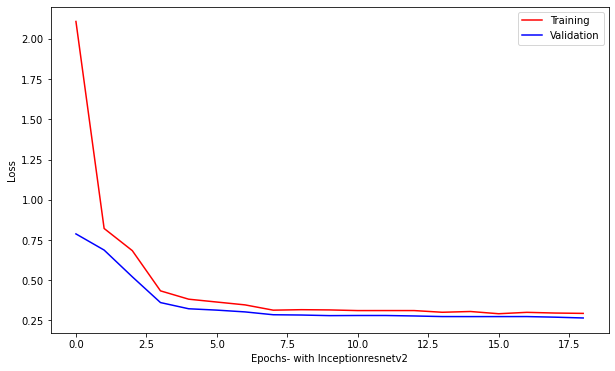

In [ ]:
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel(f"Epochs- with {cnn}")
plt.ylabel("Loss")
plt.legend()

### Accuracy Graph

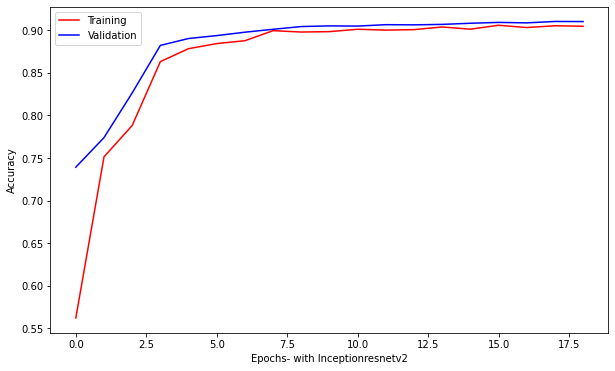

In [ ]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel(f"Epochs- with {cnn}")
plt.ylabel("Accuracy")
plt.legend()

### Prediction after Model Run

In [ ]:
predictions = standard_model.predict(valid_generator)

Model Result Inceptionresnetv2_2022-09-08
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       150
           1       0.95      0.93      0.94       150
           2       0.97      0.98      0.97       150
           3       0.89      0.89      0.89       246
           4       0.95      0.98      0.96       225
           5       0.94      0.93      0.94       157
           6       0.92      0.95      0.93       150
           7       0.92      0.82      0.87       150
           8       0.96      0.98      0.97       178
           9       0.83      0.88      0.85       150
          10       0.96      1.00      0.98       174
          11       0.87      0.88      0.87       177
          12       0.91      0.90      0.91       207
          13       0.96      0.99      0.98       161
          14       0.97      0.97      0.97       150
          15       0.99      0.99      0.99       826
          16       0.96      0.95      

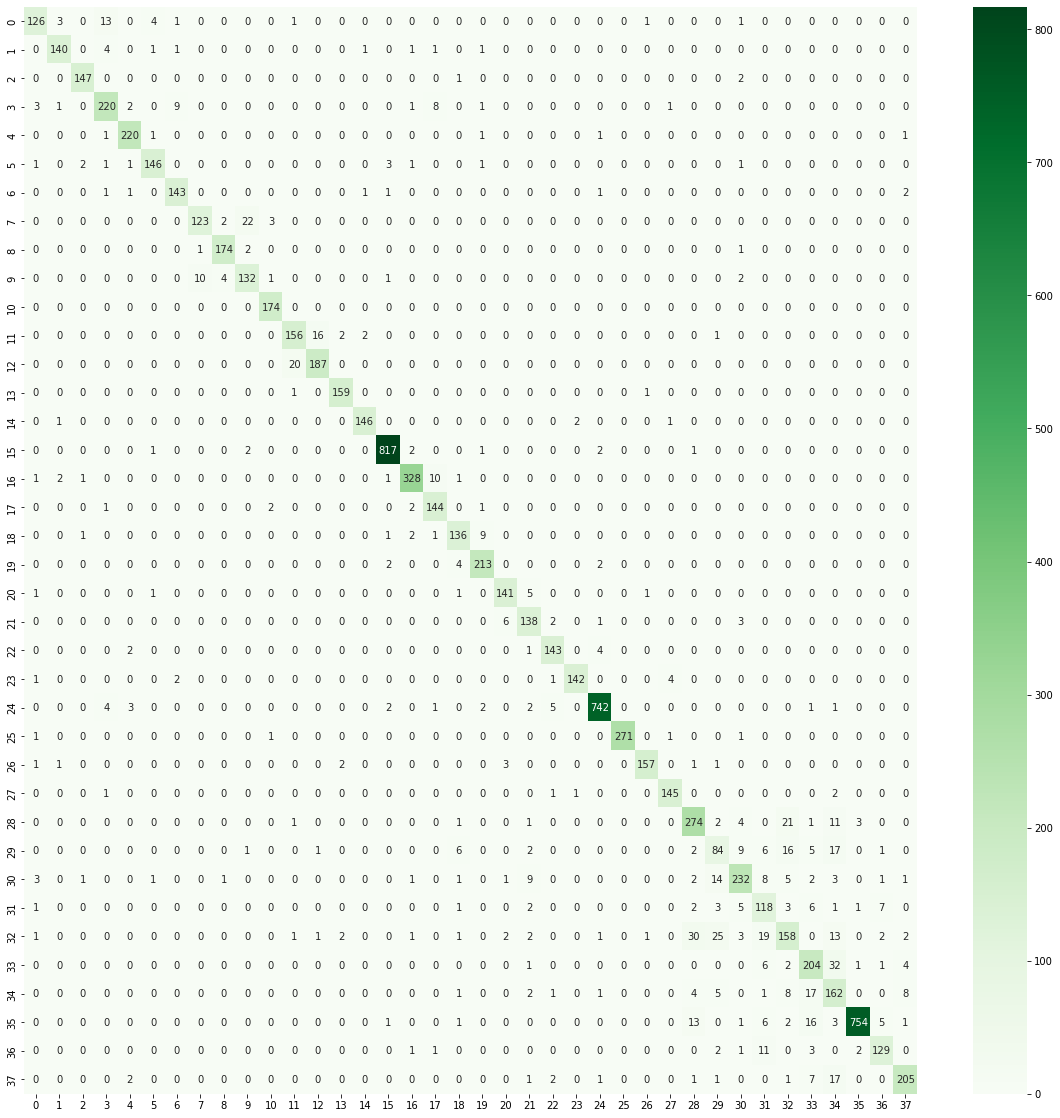

In [ ]:

from sklearn.metrics import classification_report
print(f"Model Result {cnn}_{today}")

print(classification_report(valid_generator.classes, predictions.argmax(axis=1)))

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(valid_generator.classes, predictions.argmax(axis=1))
plt.figure(figsize=(20,20))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap = "Greens")

# print(cm)

## Performance scores

In [ ]:
from sklearn.metrics import top_k_accuracy_score,cohen_kappa_score,matthews_corrcoef,recall_score

print(f"Model {cnn}\n")

cohen_kappa_score = cohen_kappa_score(valid_generator.classes, predictions.argmax(axis=1))
Metthews_correlation = matthews_corrcoef(valid_generator.classes, predictions.argmax(axis=1))
Top_K_accuracy = top_k_accuracy_score(valid_generator.classes, predictions, k=1)

print("Cohen Kappa Score: ", cohen_kappa_score)
print("Matthews correlation coefficient : ", Metthews_correlation)
print("Top k Accuracy Score: ",Top_K_accuracy)

Model Resnet101

Cohen Kappa Score:  0.9547375202854474
Matthews correlation coefficient :  0.9547562199970037
Top k Accuracy Score:  0.9565361645653616


## MLFlow 

In [ ]:
# pip install mlflow

#MLFlow

In [ ]:
!pip install mlflow --quiet
get_ipython().system_raw("mlflow ui --port 5000 &")

In [ ]:
!pip install pyngrok --quiet

from pyngrok import ngrok
from getpass import getpass

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = getpass('Enter the ngrok authtoken: ')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

Enter the ngrok authtoken: ··········
MLflow Tracking UI: https://1736-34-147-25-120.ngrok.io


In [ ]:
train_loss=History.history['loss'][-1]
train_acc=History.history['accuracy'][-1]
val_loss=History.history['val_loss'][-1]
val_acc=History.history['val_accuracy'][-1]

learning_rate = standard_model.optimizer.lr.numpy()



import mlflow
with mlflow.start_run(run_name=f"{cnn}"):
  mlflow.log_param("batch_size", 32)
  mlflow.log_param("learning_rate", learning_rate)
  mlflow.log_param("epochs", epochs)
  mlflow.log_metric("train_loss", train_loss)
  mlflow.log_metric("train_accuracy", train_acc)
  mlflow.log_metric("val_loss", val_loss)
  mlflow.log_metric("val_accuracy", val_acc)
  # mlflow.log_artifacts(f'saved_model/{cnn}_{today}')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Operations

In [ ]:
!zip -r inceptionresnetv2.zip /content/saved_model/Inceptionresnetv2_2022-09-08

  adding: content/saved_model/Inceptionresnetv2_2022-09-08/ (stored 0%)
  adding: content/saved_model/Inceptionresnetv2_2022-09-08/variables/ (stored 0%)
  adding: content/saved_model/Inceptionresnetv2_2022-09-08/variables/variables.data-00000-of-00001 (deflated 35%)
  adding: content/saved_model/Inceptionresnetv2_2022-09-08/variables/variables.index (deflated 78%)
  adding: content/saved_model/Inceptionresnetv2_2022-09-08/saved_model.pb (deflated 92%)
  adding: content/saved_model/Inceptionresnetv2_2022-09-08/keras_metadata.pb (deflated 96%)
  adding: content/saved_model/Inceptionresnetv2_2022-09-08/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download("/content/inceptionresnetv2.zip")

In [ ]:
# !rm -rf /content/__MACOSX

In [ ]:
# import shutil
# colab_link = "/content/Resnet152_2022.zip"
# gdrive_link = "/content/drive/MyDrive/Models/"
# shutil.copy(colab_link, gdrive_link)

'/content/drive/MyDrive/Models/Resnet152_2022.zip'

# Best CNN

In [3]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
train_gen = tf.keras.utils.image_dataset_from_directory(directory="/content/Dataset/train",
                                         image_size=(256, 256),
                                         batch_size = 32,
                                         )
test_gen = tf.keras.utils.image_dataset_from_directory(directory="/content/Dataset/val",
                                        image_size=(256, 256),
                                        batch_size = 32,
                                        )

rescale = tf.keras.layers.Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

test = tf.keras.utils.image_dataset_from_directory(directory="/content/Dataset/test",
                                        image_size=(256, 256))
test  = test.map(lambda image,label:(rescale(image),label))

Found 42230 files belonging to 38 classes.
Found 9042 files belonging to 38 classes.
Found 9071 files belonging to 38 classes.


In [4]:
My_model = keras.Sequential()

My_model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
My_model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
My_model.add(keras.layers.MaxPooling2D(3,3))

My_model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
My_model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
My_model.add(keras.layers.MaxPooling2D(3,3))

My_model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
My_model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
My_model.add(keras.layers.MaxPooling2D(3,3))

My_model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
My_model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

My_model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
My_model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

My_model.add(keras.layers.Flatten())

My_model.add(keras.layers.Dense(1568,activation="relu"))
My_model.add(keras.layers.Dropout(0.5))

My_model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
My_model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
My_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

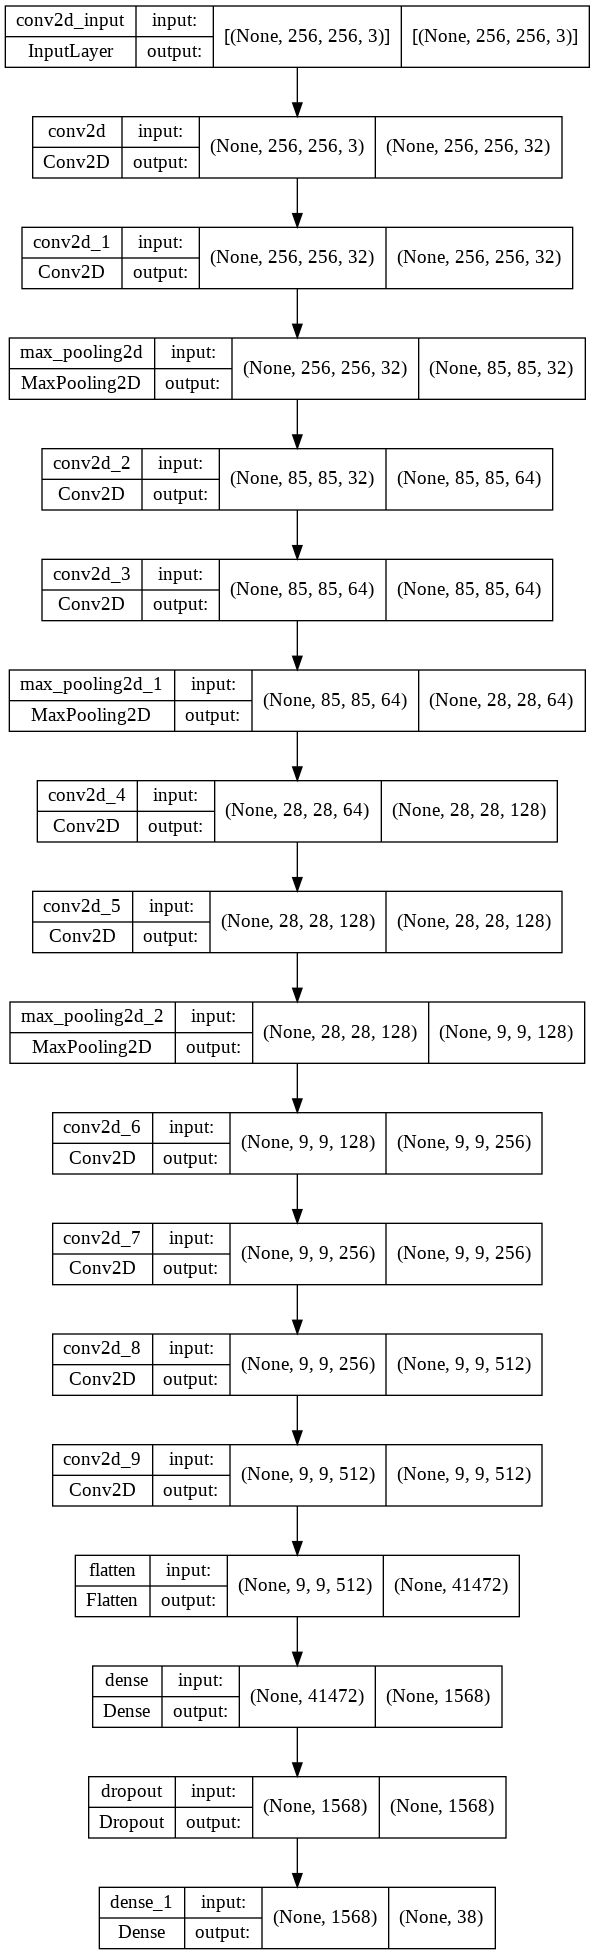

In [5]:
from keras.utils.vis_utils import plot_model
plot_model(My_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
epochs = 40
history = My_model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = epochs)

Epoch 1/40
1320/1320 [==============================] - 133s 87ms/step - loss: 2.0322 - accuracy: 0.4308 - val_loss: 0.9308 - val_accuracy: 0.7167
Epoch 2/40
1320/1320 [==============================] - 115s 87ms/step - loss: 0.6632 - accuracy: 0.7957 - val_loss: 0.5186 - val_accuracy: 0.8298
Epoch 3/40
1320/1320 [==============================] - 114s 87ms/step - loss: 0.3810 - accuracy: 0.8770 - val_loss: 0.2761 - val_accuracy: 0.9038
Epoch 4/40
1320/1320 [==============================] - 115s 87ms/step - loss: 0.2625 - accuracy: 0.9131 - val_loss: 0.2346 - val_accuracy: 0.9234
Epoch 5/40
1320/1320 [==============================] - 115s 87ms/step - loss: 0.1909 - accuracy: 0.9363 - val_loss: 0.2005 - val_accuracy: 0.9326
Epoch 6/40
1320/1320 [==============================] - 115s 87ms/step - loss: 0.1440 - accuracy: 0.9515 - val_loss: 0.1600 - val_accuracy: 0.9474
Epoch 7/40
1320/1320 [==============================] - 115s 87ms/step - loss: 0.1116 - accuracy: 0.9630 - val_loss: 0

In [ ]:
My_model.save(f'saved_model/Best_CNN_new_10th_sep.hdf5')


In [ ]:
# !zip -r CNN_4_sep.zip /content/saved_model/Best_CNN_new_4th_sep

  adding: content/saved_model/Best_CNN_new_4th_sep/ (stored 0%)
  adding: content/saved_model/Best_CNN_new_4th_sep/assets/ (stored 0%)
  adding: content/saved_model/Best_CNN_new_4th_sep/saved_model.pb (deflated 89%)
  adding: content/saved_model/Best_CNN_new_4th_sep/keras_metadata.pb (deflated 94%)
  adding: content/saved_model/Best_CNN_new_4th_sep/variables/ (stored 0%)
  adding: content/saved_model/Best_CNN_new_4th_sep/variables/variables.data-00000-of-00001 (deflated 13%)
  adding: content/saved_model/Best_CNN_new_4th_sep/variables/variables.index (deflated 72%)


In [ ]:
# from google.colab import files
# files.download("/content/CNN_4_sep.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

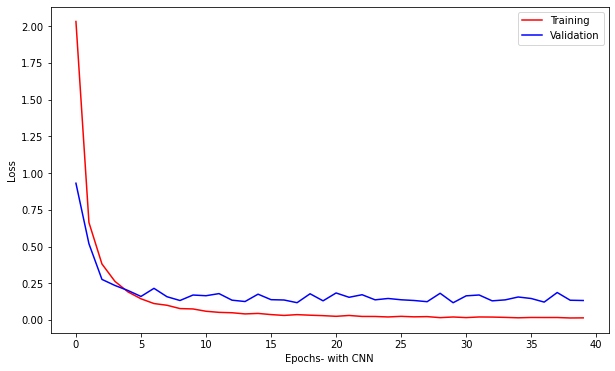

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel(f"Epochs- with CNN")
plt.ylabel("Loss")
plt.legend()

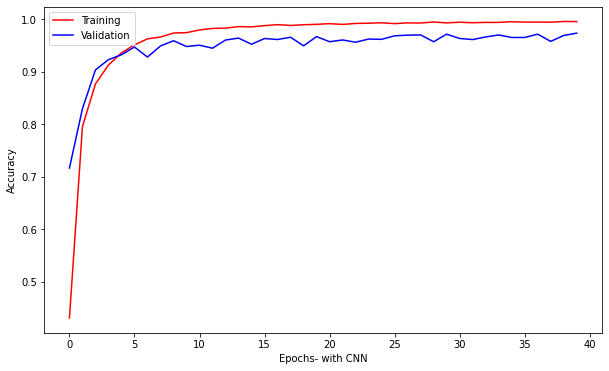

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel(f"Epochs- with CNN")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(My_model.predict(x),1).numpy())

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Training Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Testing Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Training Accuracy  : 99.60 %
Testing Accuracy   : 97.39 %
Precision Score : 97.39 %
Recall Score    : 97.39 %


In [ ]:
from sklearn.metrics import classification_report,cohen_kappa_score,matthews_corrcoef
print(f"Model Best CNN \n")
print(classification_report(labels, predictions))

cohen_kappa_score = cohen_kappa_score(labels, predictions)
Metthews_correlation = matthews_corrcoef(labels, predictions)

print("Cohen Kappa Score: ", cohen_kappa_score)
print("Matthews correlation coefficient : ", Metthews_correlation)

Model Best CNN 

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       150
           1       0.99      0.99      0.99       150
           2       0.99      1.00      1.00       150
           3       0.97      0.95      0.96       246
           4       0.98      0.99      0.99       225
           5       0.98      1.00      0.99       157
           6       1.00      0.99      0.99       150
           7       0.83      0.90      0.87       150
           8       1.00      0.99      1.00       178
           9       0.91      0.83      0.87       150
          10       0.98      1.00      0.99       174
          11       0.96      0.99      0.97       177
          12       1.00      0.98      0.99       207
          13       0.99      0.98      0.99       161
          14       0.97      0.99      0.98       150
          15       1.00      1.00      1.00       826
          16       0.97      0.98      0.97       344
          

Best CNN


<Figure size 1440x360 with 0 Axes>

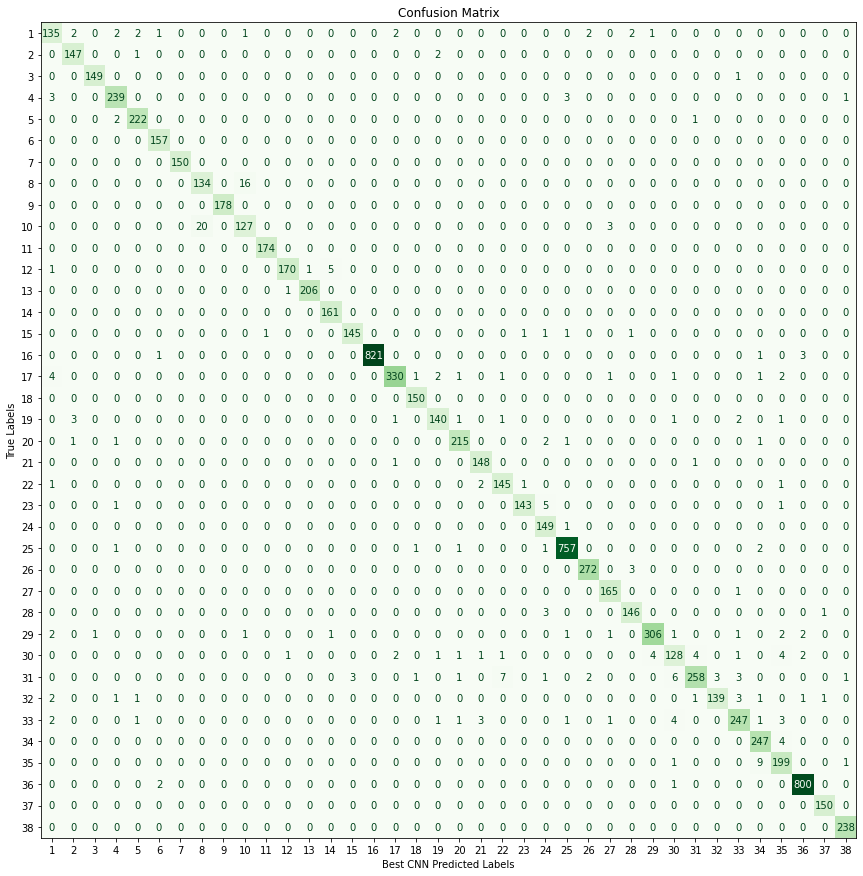

In [ ]:
print("Best CNN")

plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'Greens')
plt.title("Confusion Matrix")
plt.xlabel('Best CNN Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
train_loss=history.history['loss'][-1]
train_acc=history.history['accuracy'][-1]
val_loss=history.history['val_loss'][-1]
val_acc=history.history['val_accuracy'][-1]

learning_rate = 0.0001

import mlflow
with mlflow.start_run(run_name=f"Best CNN"):
  mlflow.log_param("batch_size", batch_size)
  mlflow.log_param("learning_rate", learning_rate)
  mlflow.log_param("epochs", epochs)
  mlflow.log_metric("train_loss", train_loss)
  mlflow.log_metric("train_accuracy", train_acc)
  mlflow.log_metric("val_loss", val_loss)
  mlflow.log_metric("val_accuracy", val_acc)
  # mlflow.log_artifacts(f'saved_model/{cnn}_{today}')
